# $p$-values and stopping rules

**Instructions**: To modify a cell, double-click it. To run a cell, hit shift+enter.

In [366]:
from scipy.special import binom
import matplotlib.pyplot as plt
import numpy as np
import itertools

## Background: coin tosses and the binomial distribution

Assume that we're tossing a coin tgat must land heads or tails (no landing on its side or vanishing into the ether), and that the probability of landing heads on any toss is independent of the pattern of prior tosses: some constant number $q$.

What's the chance of getting $m$ heads if we toss the coin $n$ times? We need three facts about probability to answer this question:
* Fact 1: the probability of independent events co-occurring is the product of the probabilities of the individual events. If I toss the coin twice, and there's a 50% chance of getting heads on each toss, then there's a 25% (= 50% × 50%) chance of getting two heads.
* Fact 2: the probability of one of several distinct events occurring is the sum of the probabilities of the individual events. If I toss the coin twice, and there's a 25% chance of getting two heads and a 25% chance of getting two tails, then there's a 50% (= 25% + 25%) chance of getting either two heads or two tails.
* Fact 3: the probability of an event *not* occurring is 1 minus the probability of the event occurring.

To get exactly $m$ heads in $n$ coin tosses, I have to get some particular sequence of results that has a total of $m$ heads (and thus $n-m$ tails). What's the chance of getting that particular sequence? By Fact 1, it's the product of the probabilities of each result in the sequence. The probability of getting heads is $q$; there are $m$ of these. By Fact 3, the probability of getting tails is $1-q$; there are $n-m$ of these. So the probability of the particular sequence is the result of multiplying $q$ a total of $m$ times by $(1-q)$ a total of $n-m$ times: this is $q^m (1-q)^{n-m}$.

But there are lots of different sequences of $n$ coin tosses that result in $m$ heads. Let's call the number of such sequences $K$. Once we know $K$, we're done: by Fact 2, the total probability of getting any one of the $K$ sequences with exactly $m$ heads is the sum of the probabilities of the individual sequences of this sort; each of these has the same probability, which we calculated in the preceding paragraph, of $q^m (1-q)^{n-m}$. So the total probability is just this added to itself $K$ times, which is just $K q^m (1-q)^{n-m}$.

So what's $K$, the number of different possible sequences of $n$ coin tosses that have exactly $m$ heads in them? Well, it's equal to the number of different ways to pick $m$ objects out of a group of $n$ objects. To see this, note that we can represent any sequence of tosses as a way of filling in a sequence of $n$ blanks \_ \_ \_ ... \_ with "H" and "T" (in the obvious correspondence): every way I can fill in the blanks with "H"s and "T"s represents a unique way the toss could go, and every possible sequence of tosses has such a representation. If I'm going to have a representation of exactly $m$ heads, I have to fill in exactly $m$ of these blanks with "H". I can pick any $m$ of the blanks to fill in with "H", but once I pick those, the rest have to be "T". So the number of possible $m$-heads tosses is exactly the same as the number of possible choices of $m$ blanks out of $n$, or, more generally, the number of possible ways to pick $m$ objects from a collection of $n$ objects. Because this situation is common, this number gets a special symbol: $n \choose m$, pronounced "n choose m."

OK, so what's $n \choose m$? That is to say, how many different ways are there to pick $m$ objects out of a bucket of $n$ total objects? Well, when I'm just starting out, I haven't chosen any; there are $n$ objects in the bucket, and so there are $n$ possible choices I can make for my first object. Now there are $n-1$ objects left in the bucket; so I have $n-1$ choices for my second object. And so on until I get to object number $m$, at which point there are $n-m+1$ objects left in the bucket. So the number of ways to choose $m$ objects out of $n$ objects, *in order*, is $n (n-1) (n-2) \cdots (n-m+1)$. But this isn't quite the answer to our question, because what we care about is the number of ways of picking $m$ objects, not the number of ways of picking $m$ objects in order: getting the same objects in a different order doesn't count as a different way of picking $m$ objects. So if $n (n-1) (n-2) \cdots (n-m+1)$ is the number of ways of picking $m$ objects, paying attention to the order, we need to divide by the number of ways of ordering $m$ objects to get the number of ways of picking $m$ objects, disregarding order. The number of ways of ordering $m$ objects, though, is given by exactly the reasoning we just went through: it's the number of ways of picking $m$ objects in order from a group of $m$ objects, or $m (m-1) (m-2) \cdots (m-m+1 = 1)$, or, in other words, $m!$. Adding this reduction factor gives us the formula we want: ${n \choose m} = \frac{n (n-1) \cdots (n-m+1)}{m!}$. Finally, we can notice that  $n (n-1) (n-2) \cdots (n-m+1) = \frac{n (n-1) (n-2) \cdots (n-m+1) (n-m) (n-m -1) \cdots 1}{(n-m)(n-m-1)\cdots 1} = \frac{n!}{(n-m)!}$, giving us the usual formula ${n \choose m} = \frac{n!}{m! (n-m)!}$.

So putting it all together, the probability of getting $m$ heads out of $n$ tosses, where the chance of any individual toss landing heads is $q$, is just $${n \choose m} q^m (1-q)^{n-m}.$$ Because this—or close variants of it—is such a common situation, this is one of the probability distributions that gets a special name: it's called the *binomial distribution*. 

Here's what the distribution looks like, in numbers, for a fair coin ($q=0.5$) tossed 10 times:


In [367]:
def bd(n,m,q):
    return binom(n,m)*(q**m)*(1-q)**(n-m)

def bprobs(n, q):
    return [bd(n,m,q) for m in range(0,n+1)]

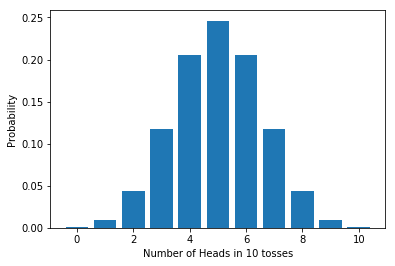

In [368]:
n = 10
q = 0.5
plt.bar(range(n+1), bprobs(n,q)); plt.ylabel('Probability'); plt.xlabel('Number of Heads in {} tosses'.format(n))
plt.show()

One fact of note is that as $n$ increases, this looks more and more like the well-known normal (Gaussian) distribution:

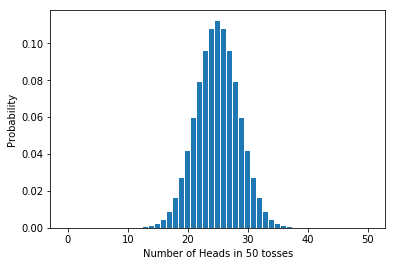

In [369]:
n = 50
q = 0.5
plt.bar(range(n+1), bprobs(n,q)); plt.ylabel('Probability'); plt.xlabel('Number of Heads in {} tosses'.format(n))
plt.show()

Another fact of note is that a change in the probability $q$ of heads shifts the distribution to the right or to the left.

Play around with $n$ and $q$ to get a feel for the behavior:

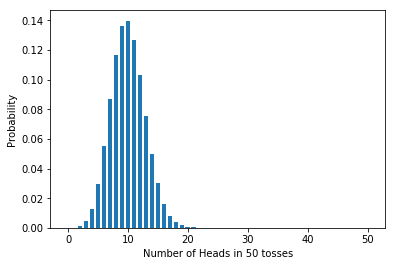

In [371]:
n = 50
q = 0.2
plt.bar(range(n+1), bprobs(n,q)); plt.ylabel('Probability'); plt.xlabel('Number of Heads in {} tosses'.format(n))
plt.show()


## $p$-values

Let's say we want to test whether our coin is fair. We toss it some number of times, and see that there are many more heads than tails. Does this give us reason to think that it's a biased coin?

This is a tricky question, because we know that a fair coin can produce any outcome — and so can a biased coin (as long as there's *some* non-zero chance of it landing heads and tails)! In other words, if we do (or simulate) some flips, and look at the resulting sequences, there's no way to know which one came from the fair coin simulation and which came from the biased coin simulation. Give it a shot:

In [372]:
def flip(q):
    # q is the chance of heads
    return 'H' if np.random.rand()<q else 'T'

def lots_of_flips(q,n):
    # q is the chance of heads; n is the number of flips
    return ''.join([flip(q) for i in range(n)])

In [373]:
lots_of_flips(q=0.5,n=100)

'HHTTTTHHHTTHTHHHHHTTHHTTTHHTTHTTTHHHTTHTHTTTHHHTTTHHHTTHTHHTTTTTHTTTHHTHHTHHTHHHTTTHTTHTTTHTHTTTTHHH'

In [374]:
lots_of_flips(q=0.7, n=100)

'HHHHHHTTHHHHHTHHHHHHHHHTHHHHHHHHHHHHHHTHHTHTHHHTHHTHHHHHTHHHHTHHTHHHTHHHTHHHHHTHTTHHTHHHHHHHHHHTTHHH'

To take a more extreme case: it's *possible* to flip a fair coin 1000 times and get heads every time; that's the nature of chance. On the other hand, this outcome is extraordinarily *improbable*: the chance of a fair coin getting this result is $0.5^{1000}$, which, in decimals, is about

0.000000000000000000000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000093326!


So if we flip a coin 1000 times and get heads every single time, we might think that the sheer improbability of getting this sequence for a fair coin gives us *very* good reason to think that the coin *isn't* fair. In other words, we might think that if our result is very improbable on the assumption that the coin is fair, we should reject that assumption.

But wait a second. There's a big problem with this line of thought. Suppose the coin is fair, and suppose we flip it a thousand times and get not a sequence of 1000 heads, but some other sequence of mixed heads and tails:

In [375]:
flips = lots_of_flips(q=0.5, n=1000)
flips

'THHTTTHHHHTTTHHTTTHTHHHHHHTHTTTTHTHHTTTTTHTHTHHTHTTHHTTHHHHHHHTHTHTHHHHTTHHHTHHTHHTHHHTHTTHTTHHTTHTHHHTTTHTTTTHHHHTHTTHTTTHTHHHHTHHTTHHTTHHTTHHHHHHTTHHHHHHTTTTTTHTHHTTTTTTHTTTTTHTTHHHHTHHTTHTHHHTTHTHTHHTTHTHTTHTHHHTHHHHHHTTTTTTHHHHTTHHHHHHHTTTHTTHHHTTHTHTTTTTTTTHTHHTTHHTHTHHHHTTTHHTHHHHHTTHHTTHHHHHHTHHTHHHHHTTHHHTTTTHHTHTHTHHTHHHTHTHHTHTHTTHTHTTTHHTHTTTHTHHTHTTTTTTHHHHHTHTHTHHHTTTTTTTHTHHTHHTTTHTTTTHHTTHHHHHHHHTHHTTTHTHTTTHHTHTHHHHHTTHTTHTHHTHHTTTTHTHHTTTTTTTHHHHTHHTTTTTTTHTTTTHHTTTHHHTHTHTTTTTHHTTHTHTTTTTTTHHTTHTHTHHHTHHHHTHHTTTTHHHTHHTHHTHTHTTTHHTTTTHTTHHHTHHHTTHTHTHHTHHHTTHTHTTHTHHHHTTTHHHTTTHHHHHHHTHTTHTTTTTHHHTHTTHTHTTTHTTHTTTHHTTTTHTHHHHHTHHHHHHTHHHTTHHHTTHTHTTTHTTTHHHTTHTHTHTHTTTHHTTTHTHTHHHHTHHTHHHHTHTHHHHTTTHTHTHHTHTTHHTTTHTHHHHTHTTTHTHTTHHHHHTTTHHHTTTHTHHHHTHTHHTTTHHTTTHTHTHHHHTTHHTHHHHHTTTTTHTTTHHHTTHTHHHHHHHTTHHHTHHHTTTHHTTTTHHHHTTHHTHHTHHHHHHHTHHHTTTTHHTHHHTTHTTHHHTHTTTTHHTHHTHTTTHHHHTTTTTHTTTHTTHHTTTTTHTHTHHHHHTHHTTHHTHHTHHHTTHHTHTHHTHTTHHTTHHTTHHTHTHTHHHHHHTHTTTTHTHTTTH

What's the probability of getting this sequence, assuming the coin is fair? Well, it's $0.5^{1000}$ — *exactly the same as the chance of getting 1000 heads*!. A fair coin has an equal chance of getting *any* particular sequence — the chance of getting any one of them is extraordinarily tiny. But surely not every outcome gives us reason to think the coin is biased!

So the reasoning we just went through can't be right: we need something stronger than just the claim that our particular result was improbable. But we can modify the reasoning in a way that gets around this worry, by looking not at the result itself, but at properties of the result. We can pick a characteristic of the result — a *test statistic* — and see how improbable it is to get a result like the one we got, insofar as the test statistic is concerned. Note that this involves a human decision — by picking a test statistic, *we're* deciding what to look at when we group results together as "alike"; the numbers aren't making that decision for us. 

For example, we can pick the *number of heads* as our test statistic. Instead of asking how unlikely it is to get the particular sequence of flips we got, we can instead ask how unlikely it is to get the number of heads we got; in this case, that's

In [376]:
def num_heads(flips):
    return sum(1 if x=='H' else 0 for x in flips)

print(num_heads(flips))

519


This goes a long way toward fixing the problem above: the chance of a fair coin getting 1000 heads is still $0.5^{1000}$, but the chance of a fair getting the number of heads we got is

In [377]:
bd(1000, num_heads(flips),0.5)

0.01226052148236955

Much better — that's googols bigger than the chance of getting 1000 heads!

But it's still not great, because it's still very improbable that we get exactly that many heads — or any other number! So the revision is still uninformative: since every possible number of heads is improbable (given a large enough number of flips), it looks like it will always say we should reject. So we can pull one more trick, and ask not whether it was unlikely that we get exactly that many heads, but whether it was unlikely (again, on the assumption that the coin is fair) that we get that many heads, or a *more extreme* result.

What does "more extreme" mean? There are two obvious ways to go here. One is to say: that many heads, or more; this is called a one-tailed test. The other is to say: that many heads or more, or that many tails or more (in other words, at least as far away from the expected number); this is called a two-tailed test. Which one of these we pick, like which test statistic we pick, is largely a matter of convention. But once we make that decision, we can calculate the chance that a fair coin would give us a result as or more extreme with respect to our test statistic; this is what's called the $p$-value.

This gives us the traditional significance test, originally formulated by Fisher: a result gives us reason to reject our default ("null") hypothesis if its $p$-value is small enough, given some (conventional) choice of test statistic, one- or two-tailed test, and value for "small enough" (called the "size" or "significance level").


## $p$-values, graphically


We can put the above reasoning graphically. If graph the probability of getting any particular sequence, we get a flat distribution if the coin is fair, since each sequence is equally (un)likely:

In [380]:
def prob(q, seq):
    return np.prod([q if x =='H' else (1-q) for x in seq])

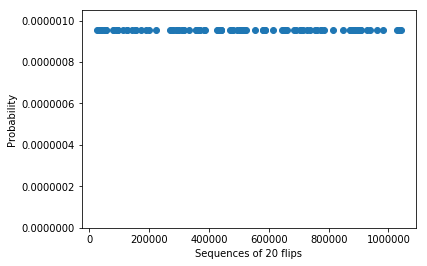

In [381]:
n = 20
q = 0.5
n_to_plot = 100 #careful, will crash if too large!
sequences = np.array([''.join(x) for x in itertools.product('HT', repeat=n)])
seqs_to_plot = np.random.choice(len(sequences),size=n_to_plot, replace=False)
probs = [prob(q, sequences[i]) for i in seqs_to_plot]
plt.scatter(seqs_to_plot, probs,  ); plt.ylabel('Probability'); plt.xlabel('Sequences of {} flips'.format(n))
plt.ylim(ymax=1.1*max(probs), ymin=0)
plt.show()

And looking at the chance of any one sequence is just looking at the (tiny, tiny) value of any one of these points

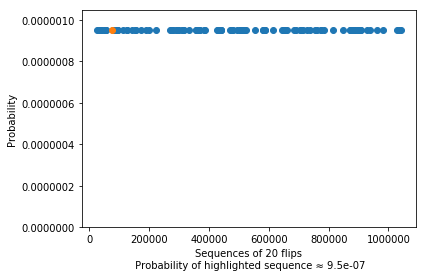

In [383]:
test_sequence = np.random.randint(len(sequences))

plt.scatter(seqs_to_plot, probs, ); plt.ylabel('Probability'); plt.xlabel('Sequences of {} flips\n Probability of highlighted sequence ≈ {:1.2g}'.format(n,prob(q, sequences[test_sequence]) ))
plt.scatter(test_sequence, prob(q, sequences[test_sequence]))
plt.ylim(ymax=1.1*max(probs), ymin=0)
plt.show()

On the other hand, if we look at the distribution of the chosen *test statistic*, the number of heads, we get the binomial distribution we derived above:

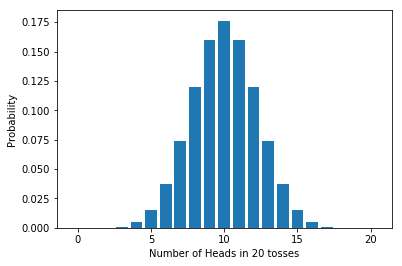

In [384]:
n = 20
q = 0.5
plt.bar(range(n+1), bprobs(n,q)); plt.ylabel('Probability'); plt.xlabel('Number of Heads in {} tosses'.format(n))
plt.show()

Looking at the likelihood of the test statistic itself amounts to just looking at the likelihood of getting some particular number $m$ of heads (play around with different values of $m$, $n$, and $q$ !):

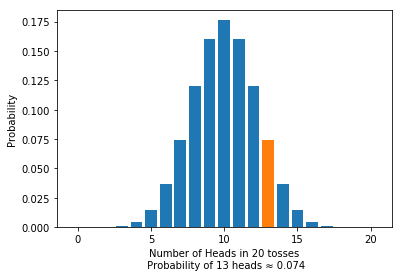

In [385]:
m = 13
plt.bar(range(n+1), bprobs(n,q)); plt.ylabel('Probability');
plt.bar(m, bd(n,m,q)); plt.xlabel('Number of Heads in {} tosses\n Probability of {} heads ≈ {:0.3f}'.format(n, m, bd(n,m,q)))
plt.show()

On the other hand, looking at the $p$-value means looking at the likelihood of getting any result as or more extreme than $m$ heads: rather than one single result, we're looking at the area of an entire region. For the one-tailed test, this looks like:

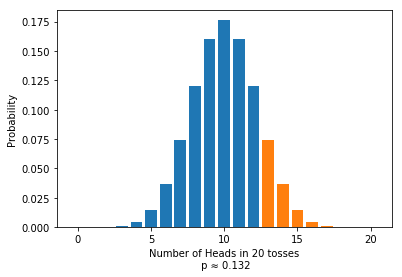

In [360]:
plt.bar(range(n+1), bprobs(n,q))
tail = range(m, n+1) if m > n/2 else range(0,m+1)
tailprobs = [bd(n,m,q) for m in tail]
plt.bar(tail, tailprobs); plt.ylabel('Probability'); plt.xlabel('Number of Heads in {} tosses\n p ≈ {:0.3f}'.format(n, sum(tailprobs)))
plt.show()

And for the two-tailed test, this looks like:

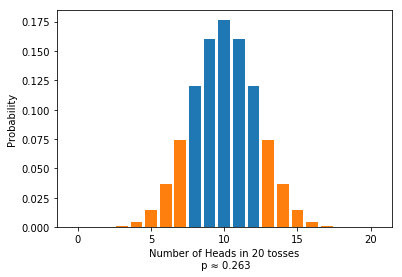

In [361]:
plt.bar(range(n+1), bprobs(n,q))
tail = [x for x in range(n+1) if abs(n/2-x)>= abs(n/2-m)]
tailprobs = [bd(n,m,q) for m in tail]
plt.bar(tail, tailprobs); plt.ylabel('Probability'); plt.xlabel('Number of Heads in {} tosses\n p ≈ {:0.3f}'.format(n, sum(tailprobs)))
plt.show()

## A different experiment

Suppose we had done our experiment differently: instead of flipping a fixed number of times, we decide we'll keep flipping until we get a total of 6 tails. This is a perfectly sensible test, because we expect different behaviors from a biased coin and a fair coin: we'd expect a fair coin to take around 12 tosses to get 6 tails, a tails-biased coin to do so in fewer tosses, and a heads-biased coin to take a longer number of tosses. We can even keep the same test statistic: the number of heads will vary between runs, since the length of runs will vary, and the number of heads is always 6 less than the number of tosses; we expect around 6 heads for a fair coin. But in this setup, the distribution of the test statistic is different

What is the distribution? We can work this out from the principles above. Assume the coin has a probability $q$ of getting heads on each toss. If a complete run of our experiments results in $m$ heads, we must have tossed it $m+6$ times, with tails on the final toss. In other words, we get a total of $m$ heads if and only if we got $m$ heads in the first $m+5$ tosses, and then a tail. The chance of getting $m$ heads in the first $m+5$ tosses is given by the binomial distribution we derived early on: ${m+5 \choose m} (1-q)^5 q^m$. The chance of getting a tail on the final toss is just $1-q$. So the total probability of getting $m$ heads is just ${m+5 \choose m}q^m (1-q)^6$. More generally, the total probability of getting $m$ heads by the time we get $r$ tails is $${m+r -1 \choose m} q^m (1-q)^r.$$

Again, this distribution has a special name: the *negative binomial distribution*. If we graph this distribution for a fair coin ($q=0.5$), it looks like:


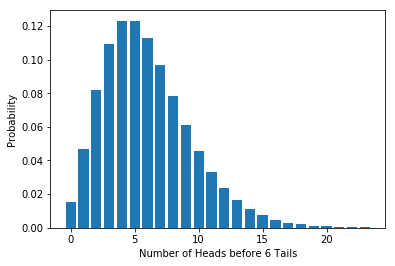

In [362]:
def nbd(m, q, r):
    return binom(m+r-1, m)*(q**m)*((1-q)**r)

q = 0.5
r = 6

ms = range(r*4)
ps = [nbd(m,q,r) for m in ms]
plt.bar(ms, ps); plt.ylabel('Probability'); plt.xlabel('Number of Heads before {} Tails'.format(r))
plt.show()


As before, we can calculate the $p$-values (one- and two-tailed) for any given result.

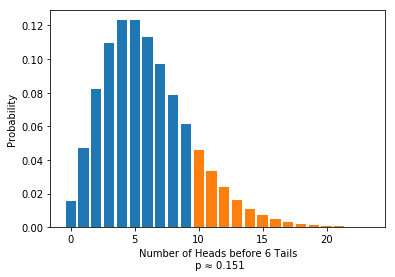

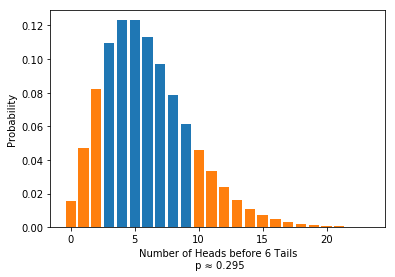

In [386]:
m = 10
#one-sided
plt.bar(ms, ps)
tail = [x for x in ms if (m>=r and x>= m) or (m< r and x<=m)]
tailprobs = [nbd(m,q,r) for m in tail]
plt.bar(tail, tailprobs); plt.ylabel('Probability'); plt.xlabel('Number of Heads before {} Tails\n p ≈ {:0.3f}'.format(r, sum(tailprobs)))
plt.show()
#two-sided
plt.bar(ms, ps)
tail = [x for x in ms if abs(x-r)>= abs(m-r)]
tailprobs = [nbd(m,q,r) for m in tail]
plt.bar(tail, tailprobs); plt.ylabel('Probability'); plt.xlabel('Number of Heads before {} Tails\n p ≈ {:0.3f}'.format(r, sum(tailprobs)))
plt.show()

## Stopping rule dependence

We can express the difference between the two experiments as a difference in when we agree to stop the experiment. In the fixed-number-of-flips experiment, we stop when and only when we reach our target number of flips. In the fixed-number-of-tails experiment, we stop when and only when we reach our target number of tails. In other words, the two experiments have different *stopping rules*.

Suppose we perform both experiments: in the fixed-flips experiment we decide to flip a total of 20 times. In the fixed-tails experiment, we decide to flip until we get 6 tails. "

There are some outcomes that are possible in both experiments. For example, we might toss the coin 20 times, and get the sequence <font style="font-variant: small-caps">hhhththhhhhthhthhhtt</font>: a total of 6 tails, 14 heads. 

Let's do significance tests on the two experiments. As far as our choices of conventions, we'll pick the same conventions for both: both will test the null hypothesis that the coin is fair; both will use the number of heads as a test statistic; both will use a two-sided test; both will reject the null hypothesis only if the $p$-value is less than $0.05$ (a typical choice).

Pulling from the above, for the fixed-flips test we have:

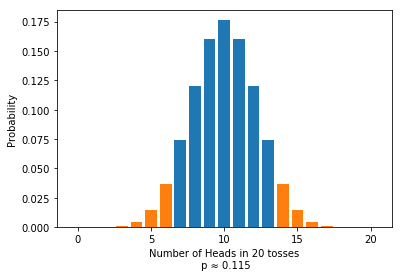

In [389]:
n = 20
q = 0.5
m = 14
plt.bar(range(n+1), bprobs(n,q))
tail = [x for x in range(n+1) if abs(n/2-x)>= abs(n/2-m)]
tailprobs = [bd(n,m,q) for m in tail]
plt.bar(tail, tailprobs); plt.ylabel('Probability'); plt.xlabel('Number of Heads in {} tosses\n p ≈ {:0.3f}'.format(n, sum(tailprobs)))
plt.show()

The $p$-value here is greater than $0.05$: according to the test, it's not a result significant enough to warrant rejecting the null hypothesis that the coin is fair.

At the same time, for the fixed-tails test, we have:

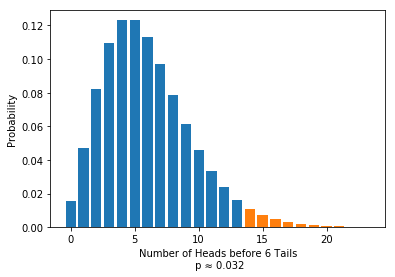

In [391]:
r = 6
q = 0.5
m = 14
ms = range(r*4)
ps = [nbd(m,q,r) for m in ms]
tail = [x for x in ms if abs(x-r)>= abs(m-r)]
tailprobs = [nbd(m,q,r) for m in tail]
plt.bar(ms, ps)
plt.bar(tail, tailprobs); plt.ylabel('Probability'); plt.xlabel('Number of Heads before {} Tails\n p ≈ {:0.3f}'.format(r, sum(tailprobs)))
plt.show()

The $p$-value here is less than $0.05$; according to the significance test, this is a result that **is** significant enough to warrant rejecting the null hypothesis!

But the only difference between the two situations is the stopping rule used! In other words, the *very same sequence* of coin tosses, with the *very same conventions*, leads to opposite conclusions, depending on which stopping rule was used.